In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_selection import SelectKBest, chi2

In [2]:
X = pd.read_csv('/Users/ilya/Desktop/Course_work_Data_mining/CompleteDataSet/x_train_all.csv')
y = pd.read_csv('/Users/ilya/Desktop/Course_work_Data_mining/CompleteDataSet/y_train_all.csv')

In [17]:
X.shape

(9690, 2304)

In [3]:
# Normalize the data to range [0, 1]
x_normalized = X / 255

### `train_test_split`

In [4]:
# Splitting the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.2, stratify=y, random_state=42)


In [5]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train.values.ravel())

y_pred_rf = rf_model.predict(X_test)

# Calculating the metrics
accuracy = accuracy_score(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf)

print(accuracy.round(3))
print(class_report)

0.976
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        42
           1       0.95      0.99      0.97       444
           2       0.97      0.97      0.97       450
           3       0.99      0.98      0.98       282
           4       0.99      0.98      0.98       396
           5       1.00      0.88      0.94        42
           6       0.99      0.96      0.97        72
           7       1.00      1.00      1.00        48
           8       0.96      0.97      0.97       108
           9       1.00      0.98      0.99        54

    accuracy                           0.98      1938
   macro avg       0.98      0.96      0.97      1938
weighted avg       0.98      0.98      0.98      1938



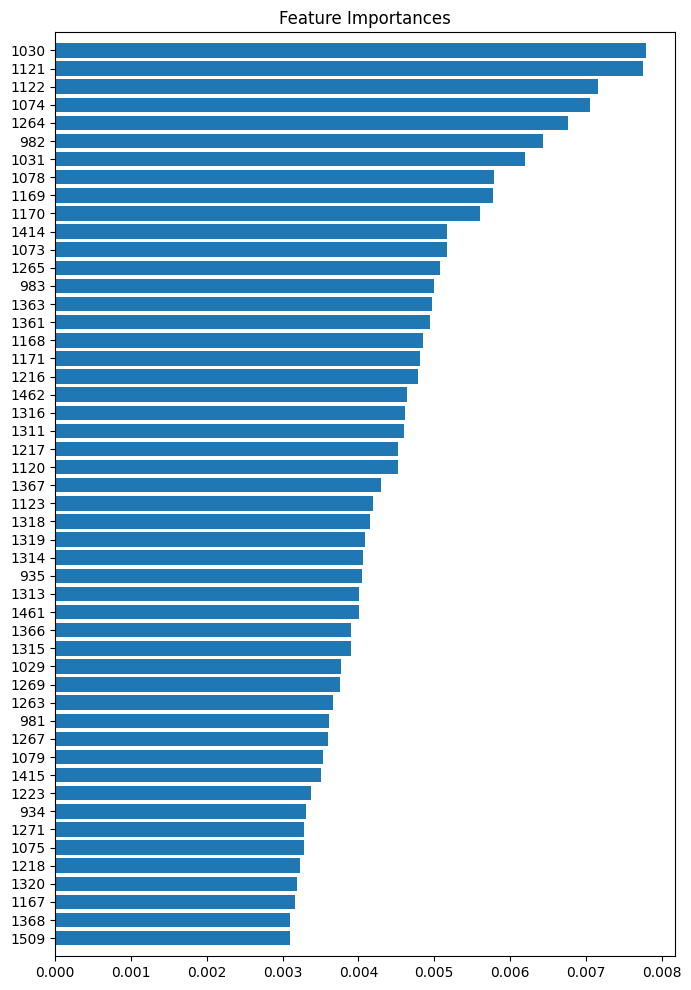

In [6]:
import matplotlib.pyplot as plt

# Extract feature importances
importances_rf = rf_model.feature_importances_

# Sort feature importances in descending order and get the indices
indices_rf = np.argsort(importances_rf)[::-1]

# Plot the top 'n' feature importances
n = 50  # for example, top 50 features
plt.figure(figsize=(8, 12))  # Adjusted the figure size for vertical orientation
plt.title("Feature Importances")
plt.barh(range(n), importances_rf[indices_rf[:n]], align="center")
plt.yticks(range(n), indices_rf[:n])
plt.ylim([-1, n])
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

In [48]:
accuracy_dict = {}

for i in range(1, 510):
    X_rf = x_normalized[indices_rf[:i].astype(str)]

    # Splitting the data into training and validation sets
    X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y, test_size=0.2, stratify=y, random_state=42)

    # Applying Gaussian Naive Bayes
    gnb = GaussianNB()
    gnb.fit(X_train_rf, y_train_rf.values.ravel())
    y_pred_rf = gnb.predict(X_test_rf)

    # Calculating the metrics
    accuracy = accuracy_score(y_test_rf, y_pred_rf)
    accuracy_dict[i] = accuracy.round(3)

# Find the maximum accuracy and the corresponding number of features
max_accuracy = max(accuracy_dict, key=accuracy_dict.get)
print(f"Maximum accuracy: {accuracy_dict[max_accuracy]} with {max_accuracy} features")

Maximum accuracy: 0.418 with 53 features


In [49]:
# We tried different number of features and "150" is the most efficient number of features
X_rf = x_normalized[indices_rf[:53].astype(str)]
print(X_rf.shape)
X_rf.head()

(9690, 53)


,1030,1121,1122,1074,1264,982,1031,1078,1169,1170,...,1271,1075,1218,1320,1167,1368,1509,1032,1221,1172
0,0.607843,0.772549,0.749020,0.639216,0.917647,0.749020,0.705882,0.509804,0.878431,0.843137,...,0.733333,0.588235,0.874510,0.733333,0.827451,0.733333,0.572549,0.721569,0.627451,0.737255
1,0.517647,0.796078,0.796078,0.764706,0.760784,0.552941,0.533333,0.607843,0.858824,0.854902,...,0.690196,0.694118,0.898039,0.784314,0.478431,0.698039,0.639216,0.549020,0.654902,0.850980
2,0.529412,0.811765,0.772549,0.701961,0.890196,0.556863,0.470588,0.650980,0.878431,0.850980,...,0.698039,0.717647,0.874510,0.772549,0.741176,0.713725,0.701961,0.486275,0.533333,0.756863
3,0.498039,0.854902,0.854902,0.811765,0.882353,0.533333,0.525490,0.478431,0.890196,0.854902,...,0.788235,0.835294,0.811765,0.682353,0.792157,0.592157,0.835294,0.537255,0.509804,0.627451
4,0.592157,0.666667,0.603922,0.588235,0.878431,0.831373,0.745098,0.525490,0.666667,0.631373,...,0.478431,0.541176,0.764706,0.764706,0.729412,0.800000,0.439216,0.862745,0.764706,0.752941


In [50]:
# Splitting the data into training and validation sets
X_train_rf, X_tes_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y, test_size=0.2, stratify=y, random_state=42)

# Applying Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_rf, y_train_rf.values.ravel())
y_pred_rf = gnb.predict(X_tes_rf)

# Calculating the metrics
accuracy = accuracy_score(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf)

print(accuracy.round(3))
print(class_report)


0.418
              precision    recall  f1-score   support

           0       0.22      0.83      0.35        42
           1       0.73      0.51      0.60       444
           2       0.76      0.34      0.47       450
           3       0.31      0.60      0.41       282
           4       0.98      0.16      0.27       396
           5       0.57      0.19      0.29        42
           6       0.24      0.64      0.34        72
           7       0.50      0.35      0.41        48
           8       0.58      0.48      0.53       108
           9       0.13      0.78      0.22        54

    accuracy                           0.42      1938
   macro avg       0.50      0.49      0.39      1938
weighted avg       0.66      0.42      0.43      1938



In [52]:
X_train_rf = pd.DataFrame(X_train_rf)

In [54]:
X_test_rf = pd.DataFrame(X_test_rf)

In [56]:
X_train_rf.to_csv("X_train_rf.csv", sep=',', index=False)
X_test_rf.to_csv("X_test_rf.csv", sep=',', index=False)